In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mgs import BioProject, Enrichment, MGSData
from datetime import date

In [2]:
df = pd.read_table("fits/rothman-sars_cov_2.tsv")
df = pd.wide_to_long(
    df, 
    stubnames=["y_tilde", "theta"], 
    i="draws", 
    j="sample", 
    sep=".",
)
df.reset_index(inplace=True)

In [3]:
bioproject = BioProject("PRJNA729801")

mgs_data = MGSData.from_repo()
attrs = list(
    mgs_data.sample_attributes(
        bioproject,
        enrichment=Enrichment.VIRAL,
    ).values()
)

def get_sample_attrs(attr: str):
    f = lambda i: getattr(attrs[i - 1], attr)
    return np.vectorize(f)

In [4]:
df["date"] = get_sample_attrs("date")(df["sample"])
df["county"] = get_sample_attrs("county")(df["sample"])
df["plant"] = get_sample_attrs("fine_location")(df["sample"])
df["total_reads"] = get_sample_attrs("reads")(df["sample"])

df["viral_reads"] = df["y_tilde"]
df["prevalence_per100k"] = np.exp(df["theta"])
df["observation_type"] = "posterior"

In [5]:
df_obs = pd.read_table("covid_input.tsv")
df_obs["date"] = list(map(date.fromisoformat, df_obs["date"]))
df = pd.concat([df,df_obs], ignore_index = True)

df["reads_per_prev"] = df["viral_reads"] / df["prevalence_per100k"]

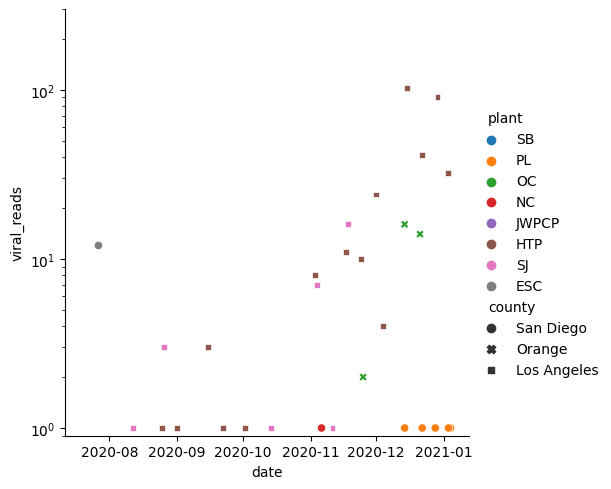

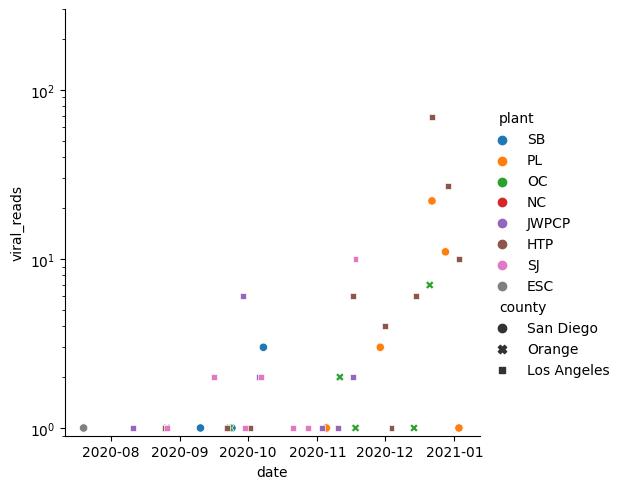

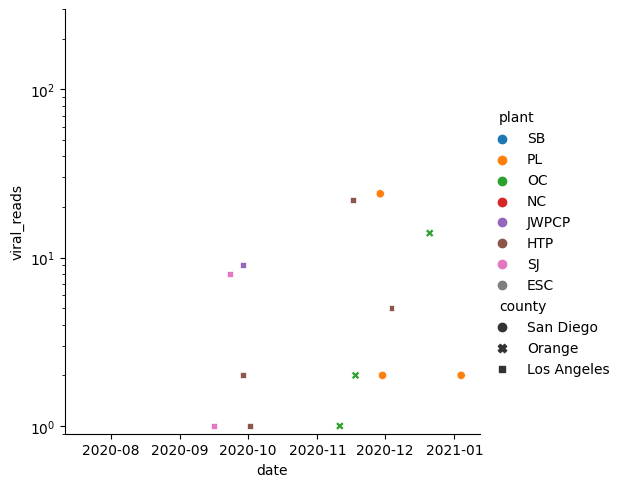

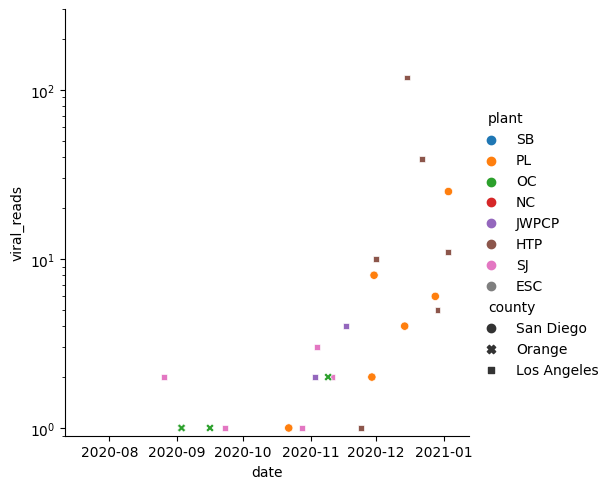

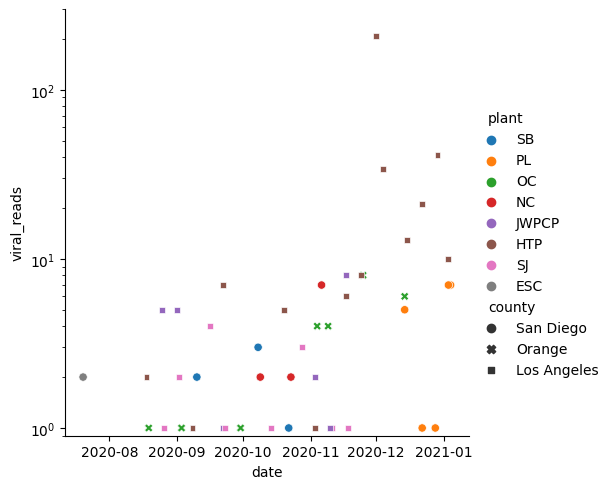

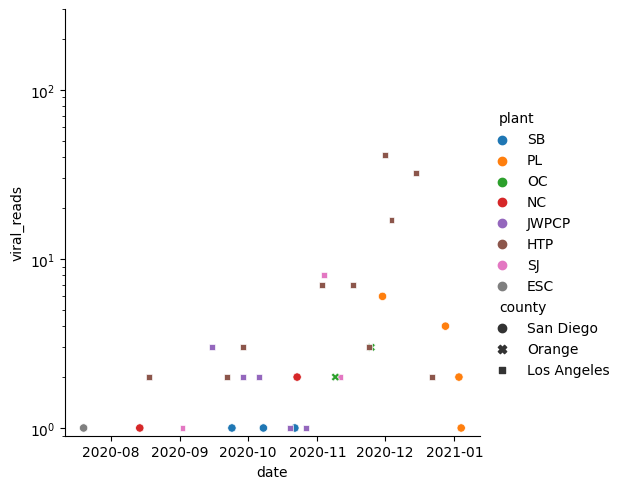

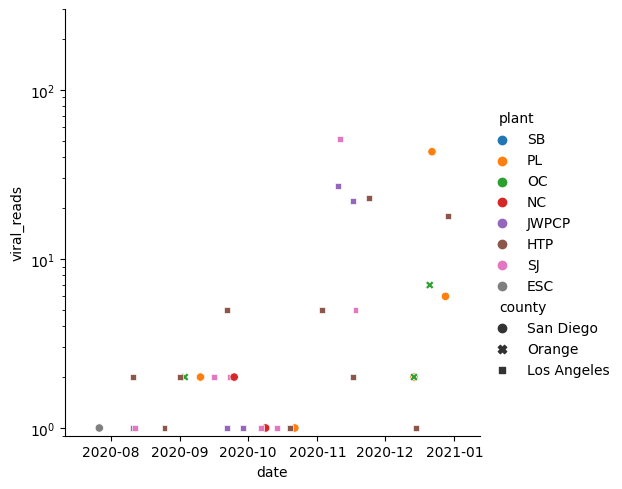

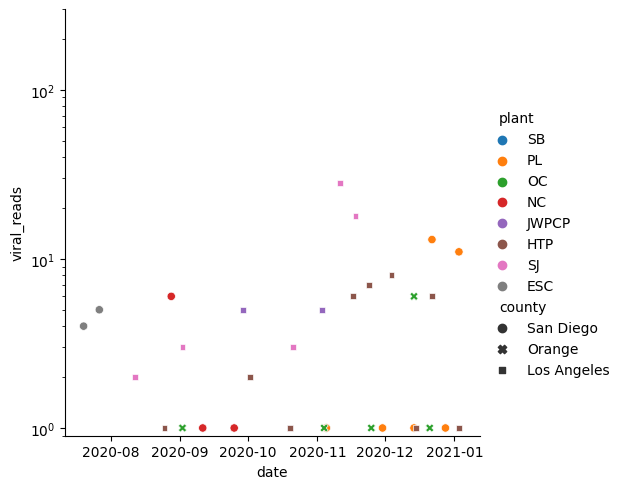

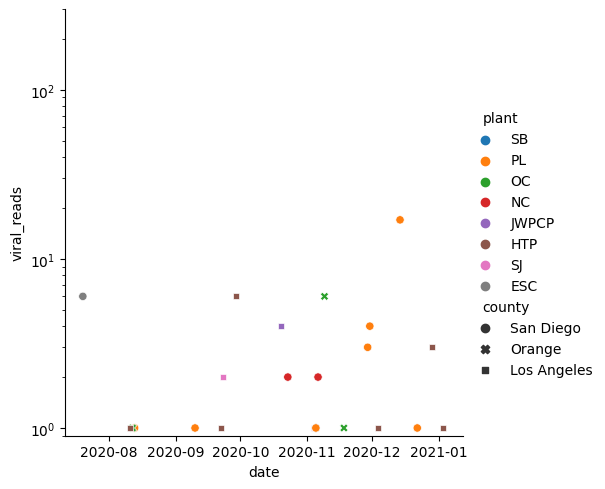

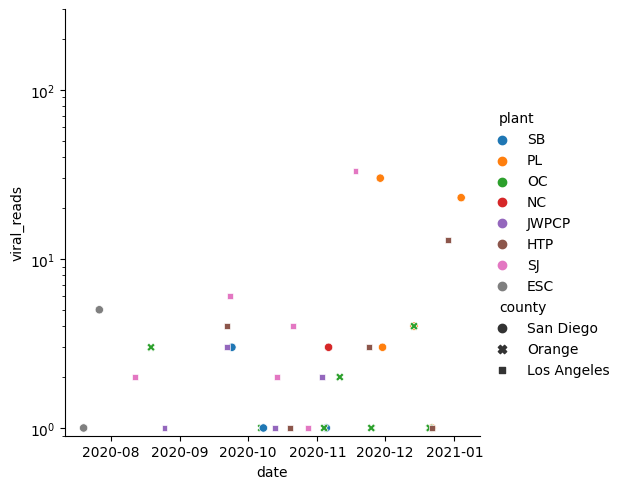

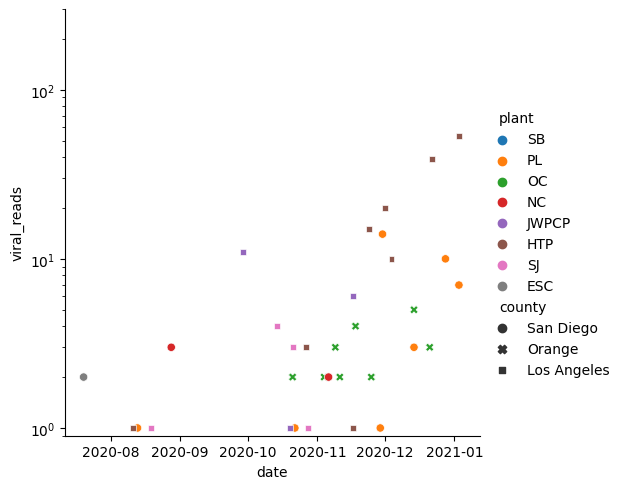

In [6]:
sns.relplot(
    data=df[df["observation_type"] == "data"],
    x="date",
    y="viral_reads",
    hue="plant",
    style="county",
)
plt.yscale("log")
plt.ylim([0.9, 300])

for draw in range(1, 100, 10):
    sns.relplot(
        data=df[df["draws"] == draw],
        x="date",
        y="viral_reads",
        hue="plant",
        style="county",
    )
    plt.yscale("log")
    plt.ylim([0.9, 300])


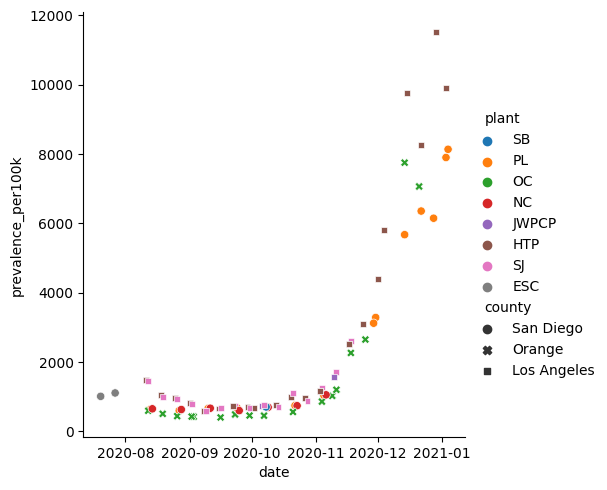

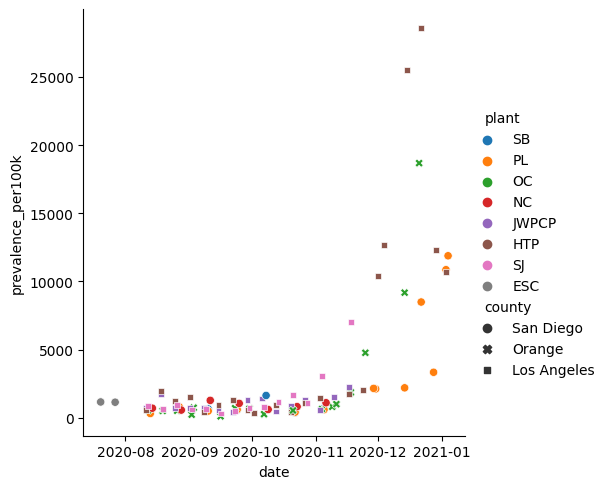

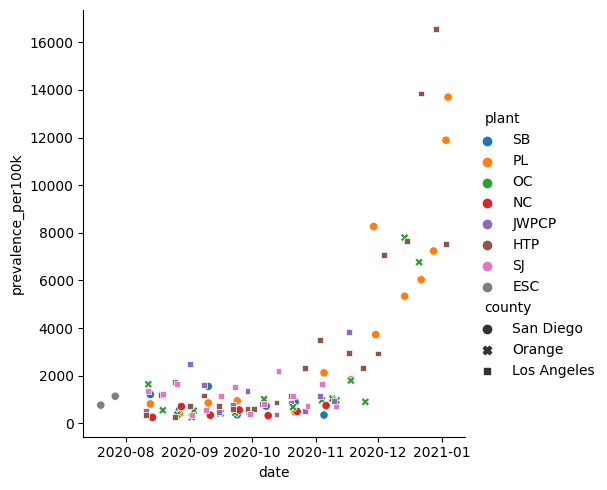

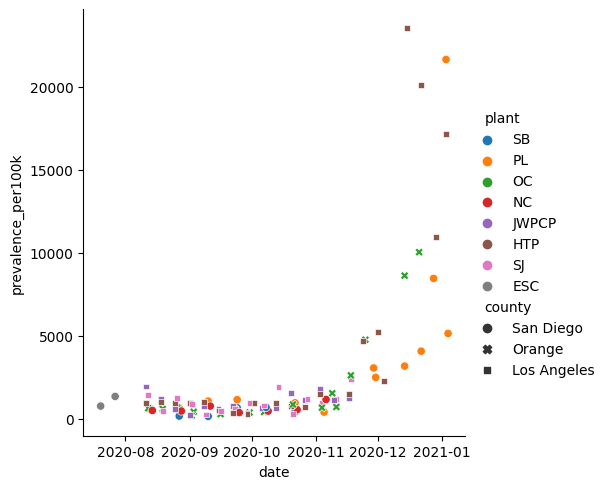

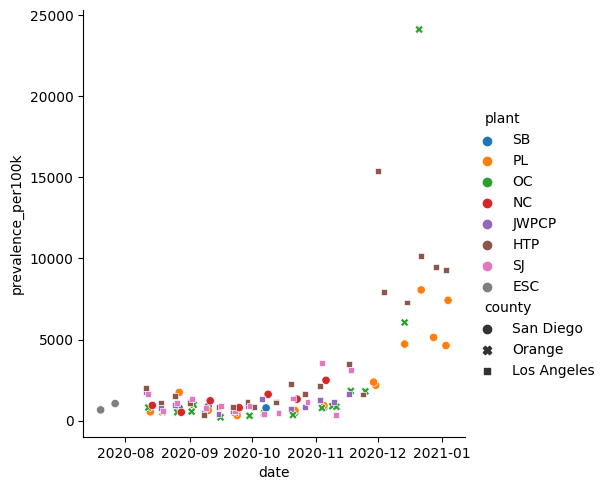

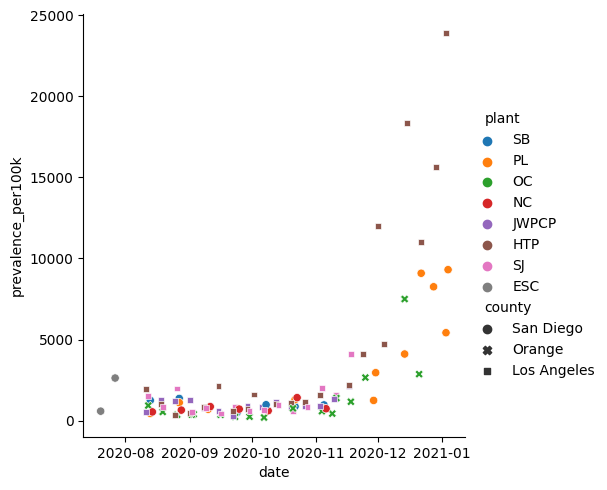

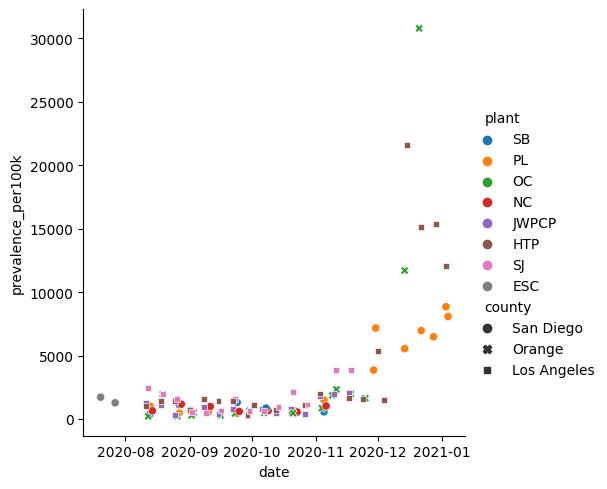

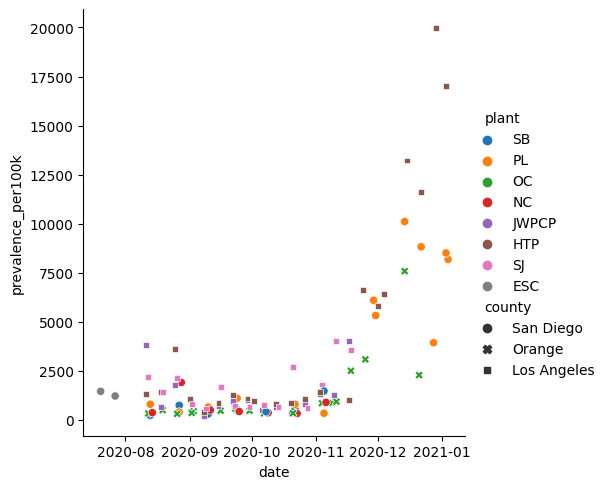

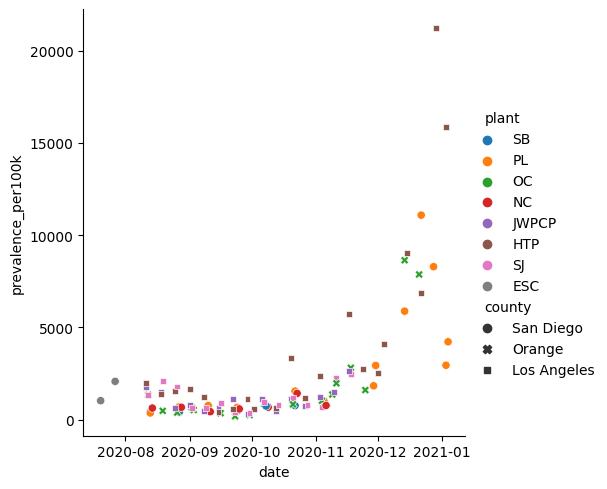

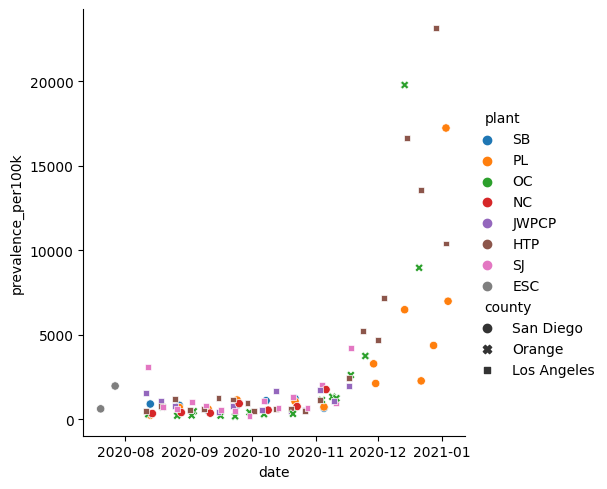

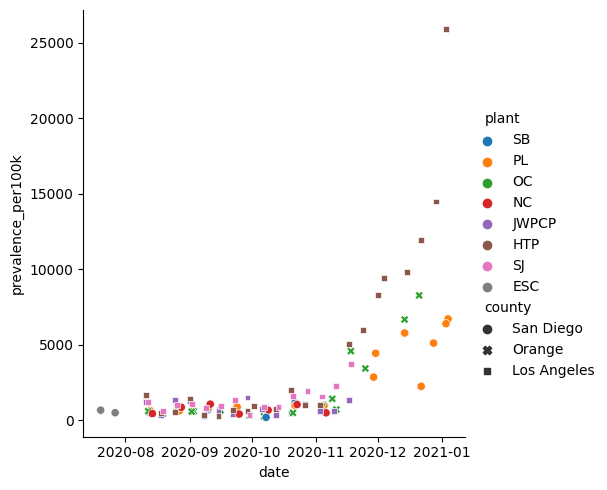

In [7]:
sns.relplot(
    data=df[df["observation_type"] == "data"],
    x="date",
    y="prevalence_per100k",
    hue="plant",
    style="county",
)

for draw in range(1, 100, 10):
    sns.relplot(
        data=df[df["draws"] == draw],
        x="date",
        y="prevalence_per100k",
        hue="plant",
        style="county",
)


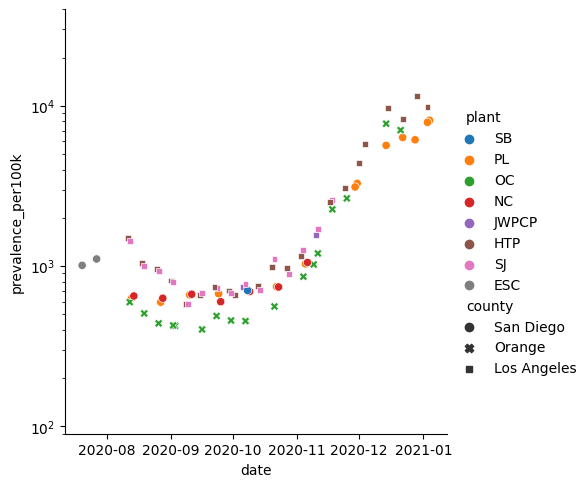

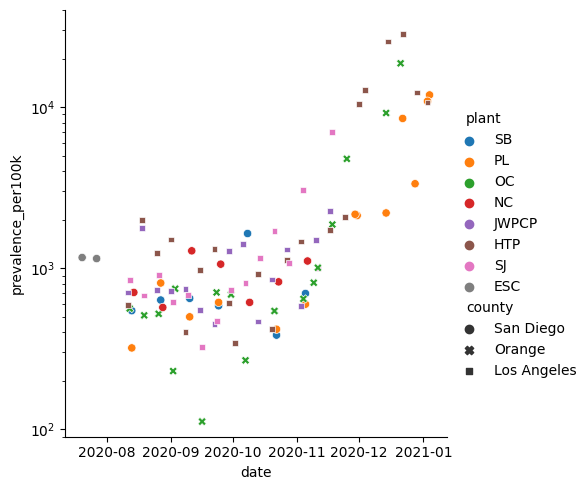

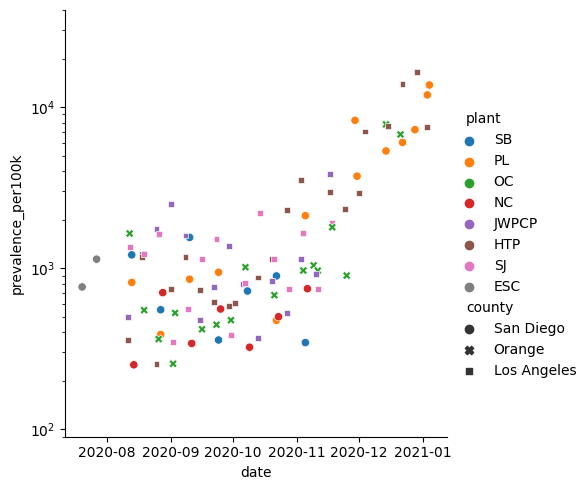

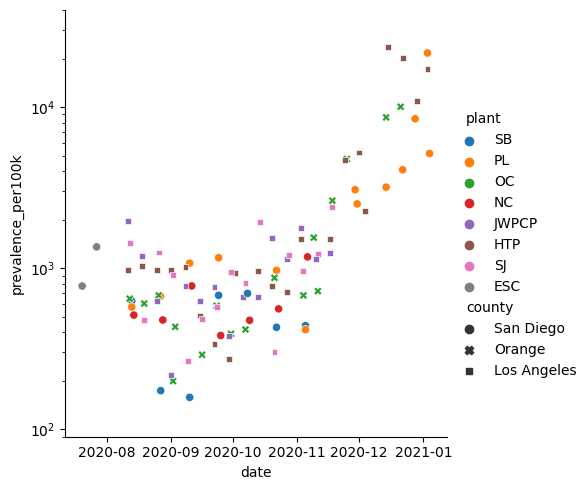

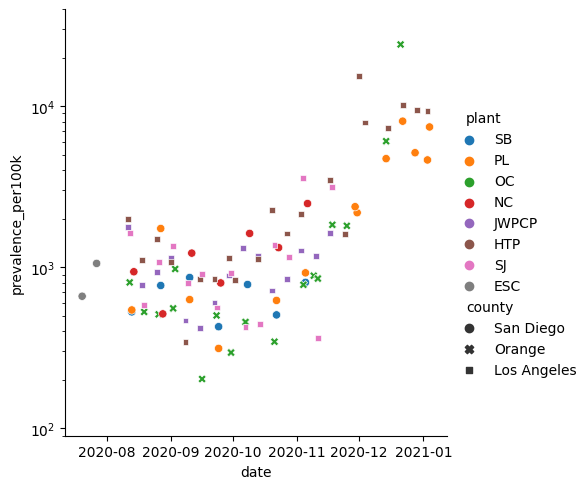

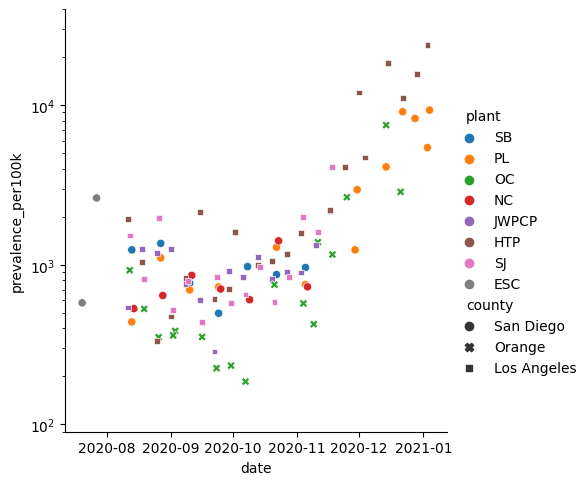

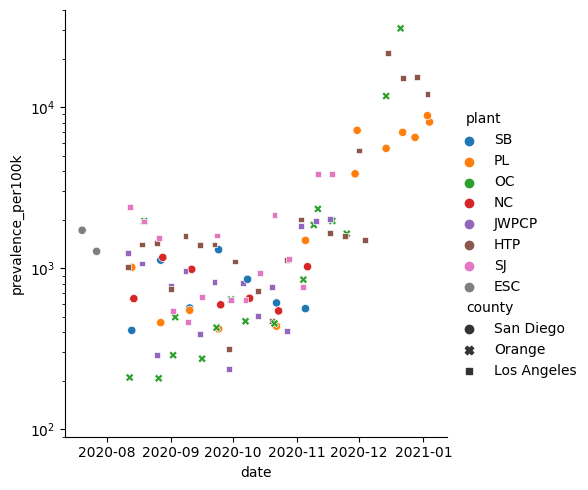

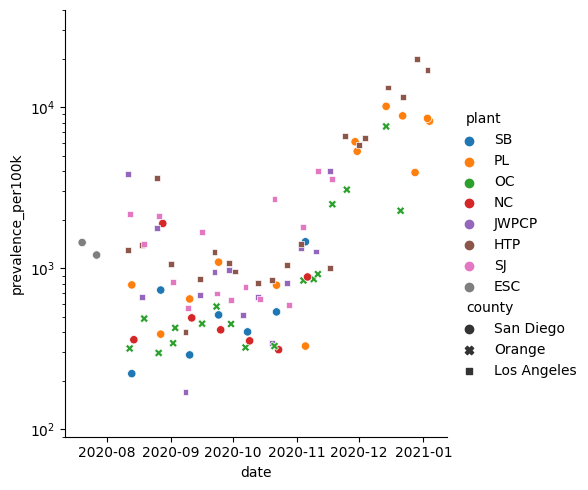

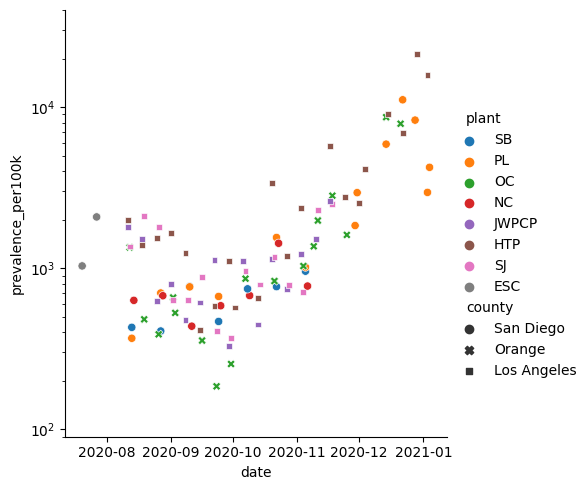

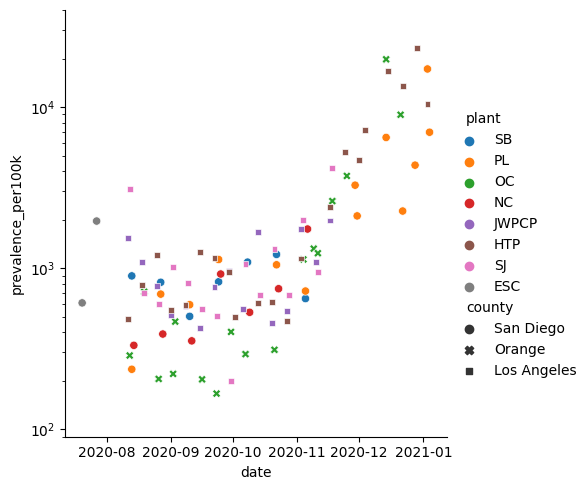

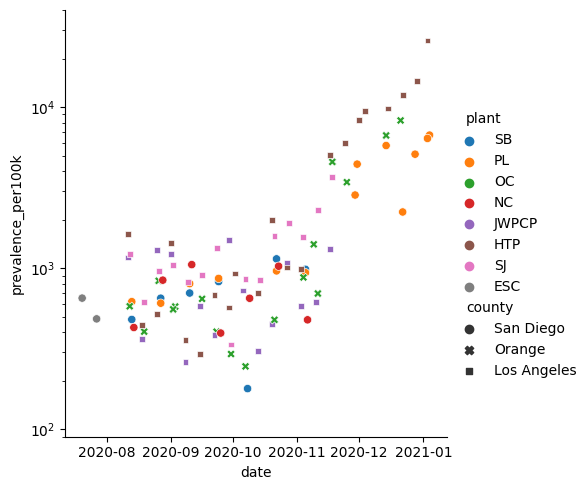

In [8]:
sns.relplot(
    data=df[df["observation_type"] == "data"],
    x="date",
    y="prevalence_per100k",
    hue="plant",
    style="county",
)
plt.yscale("log")
plt.ylim([9e1, 4e4])

for draw in range(1, 100, 10):
    sns.relplot(
        data=df[df["draws"] == draw],
        x="date",
        y="prevalence_per100k",
        hue="plant",
        style="county",
    )
    plt.yscale("log")
    plt.ylim([9e1, 4e4])

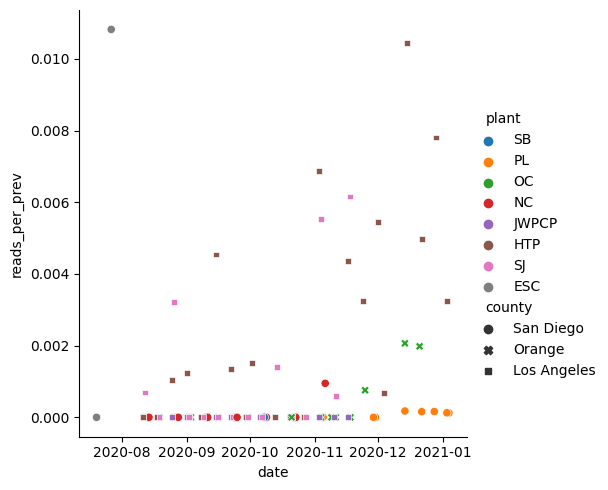

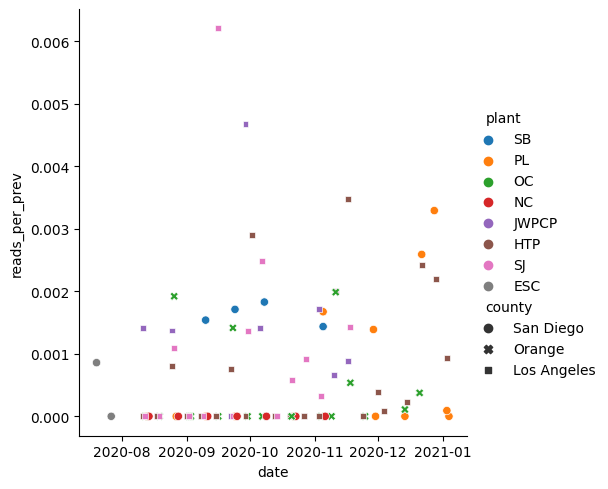

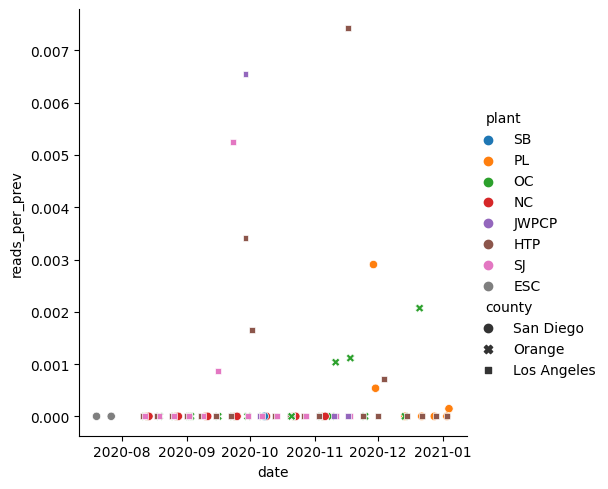

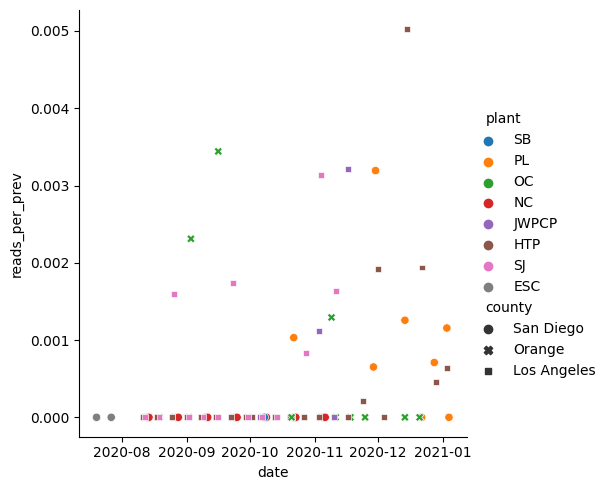

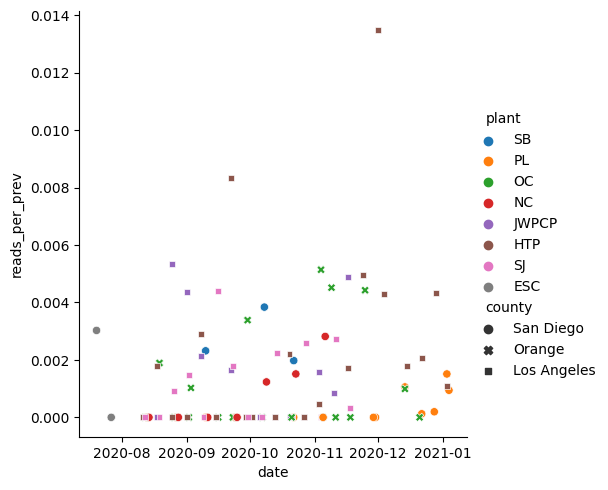

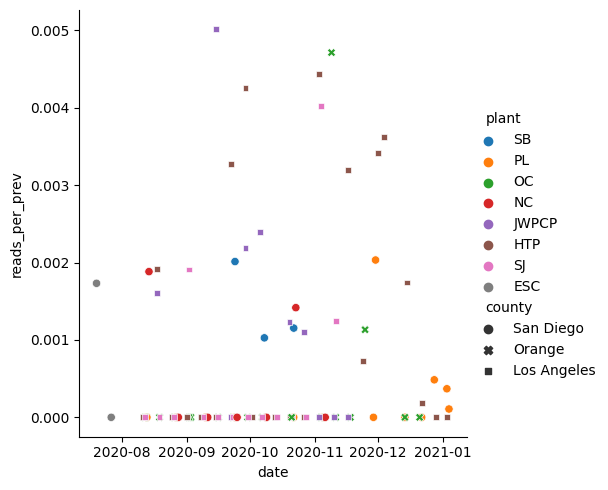

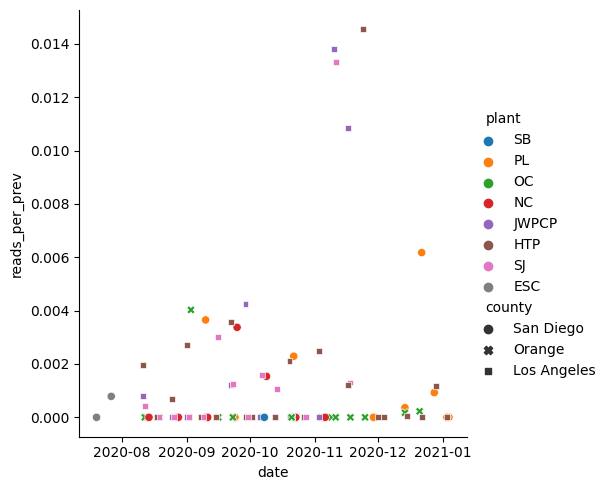

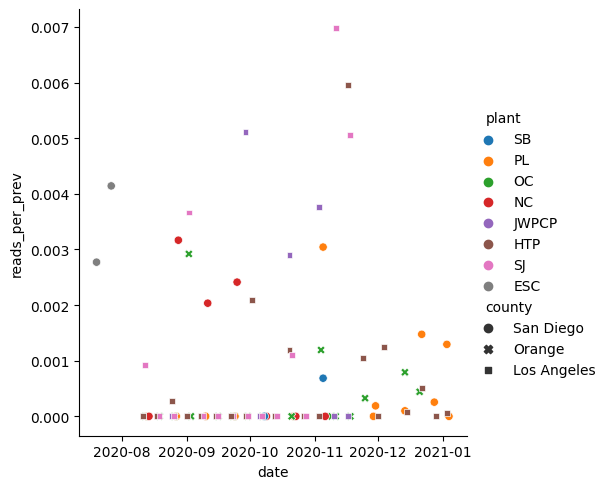

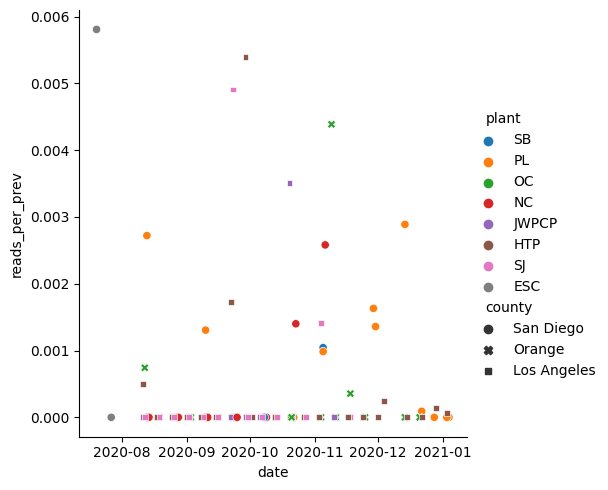

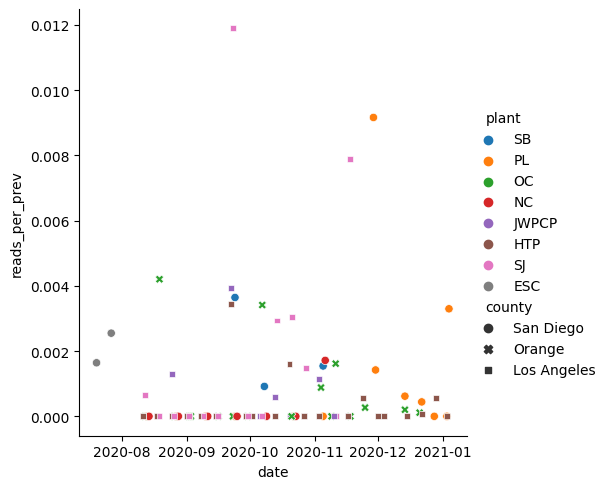

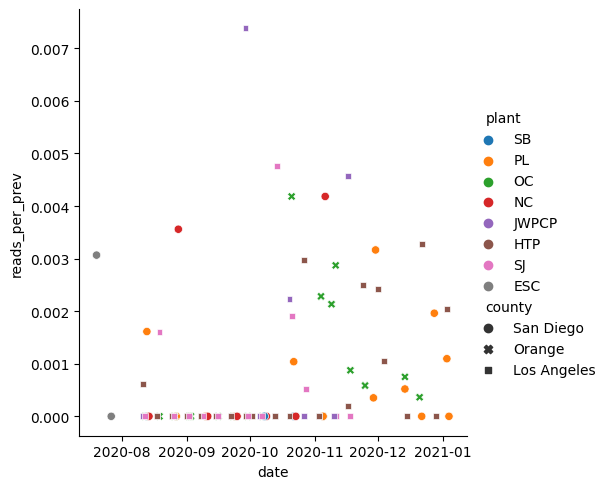

In [9]:
sns.relplot(
    data=df[df["observation_type"] == "data"],
    x="date",
    y="reads_per_prev",
    hue="plant",
    style="county",
)

for draw in range(1, 100, 10):
    sns.relplot(
        data=df[df["draws"] == draw],
        x="date",
        y="reads_per_prev",
        hue="plant",
        style="county",
)


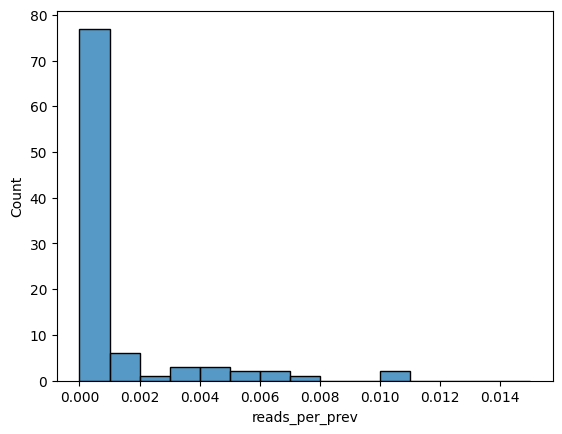

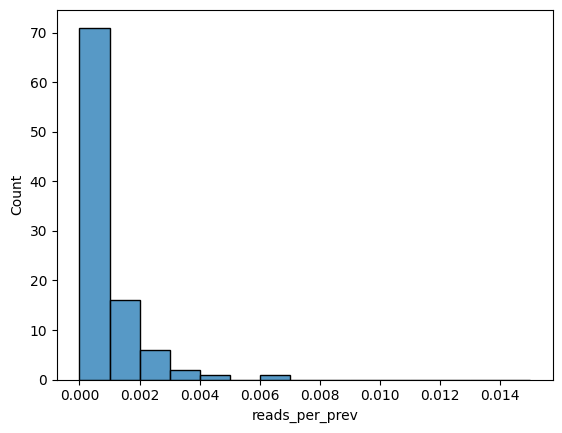

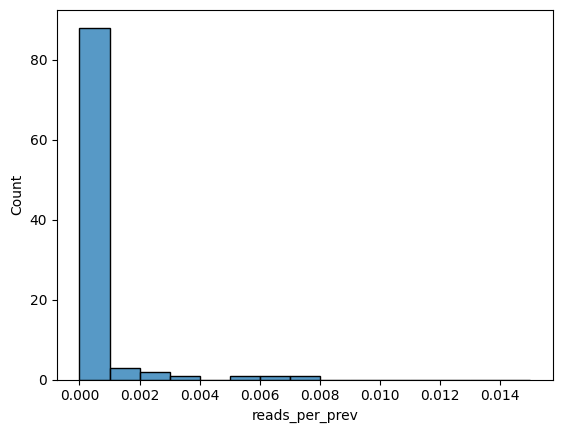

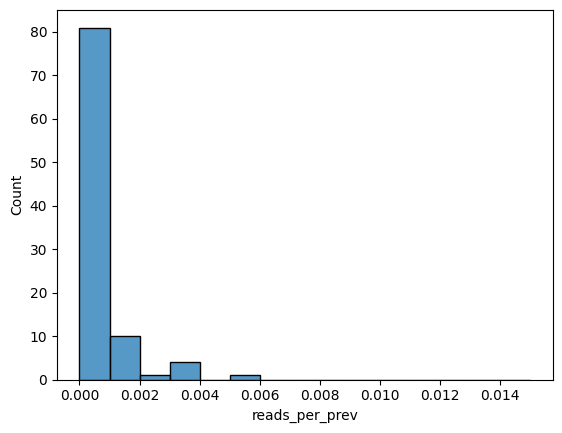

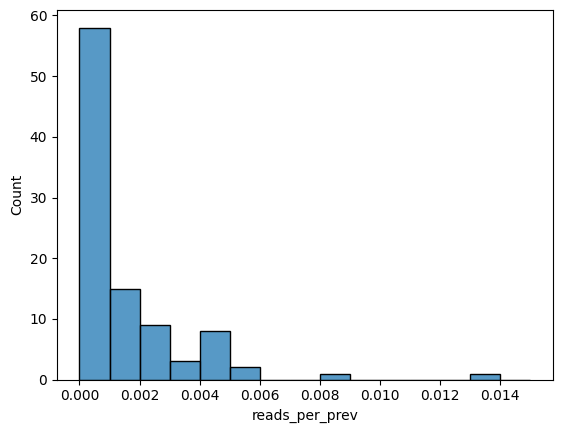

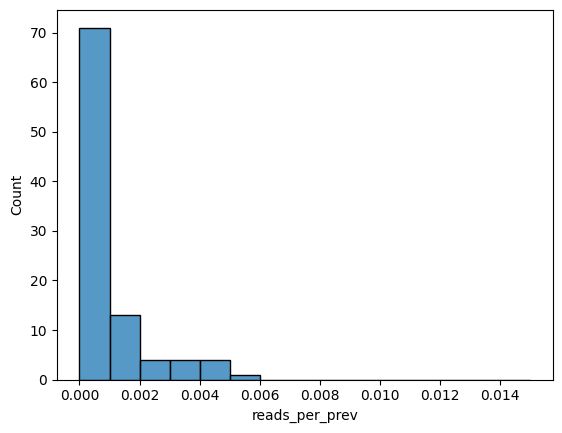

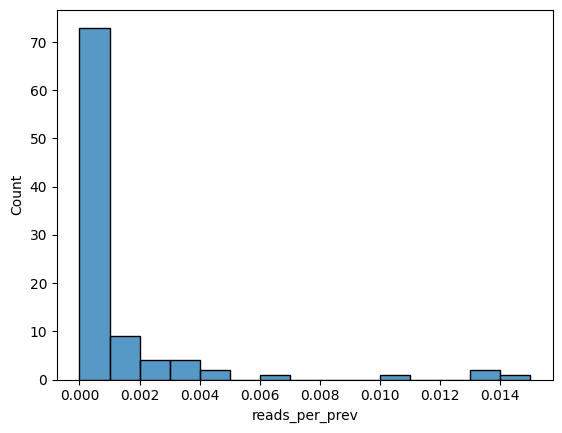

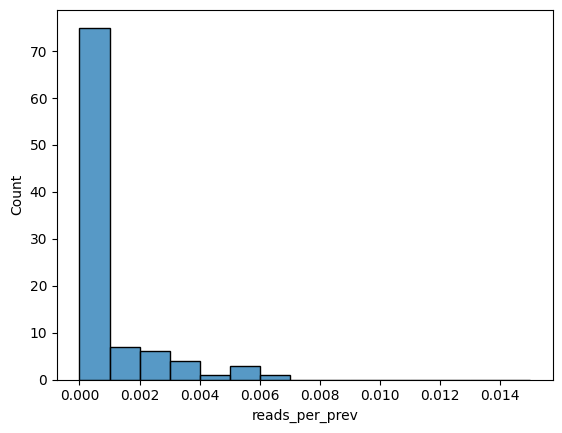

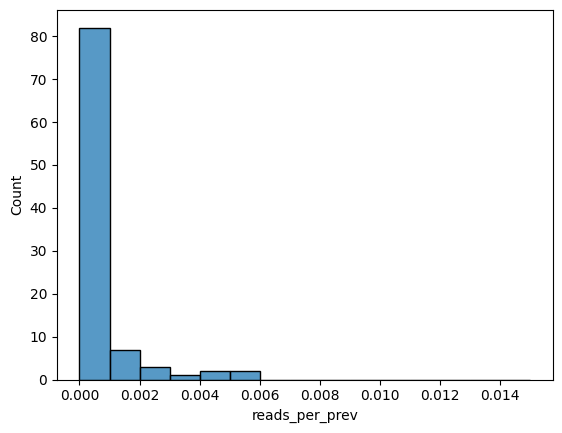

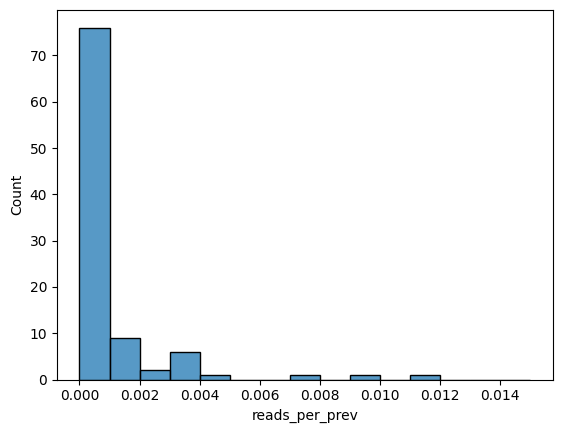

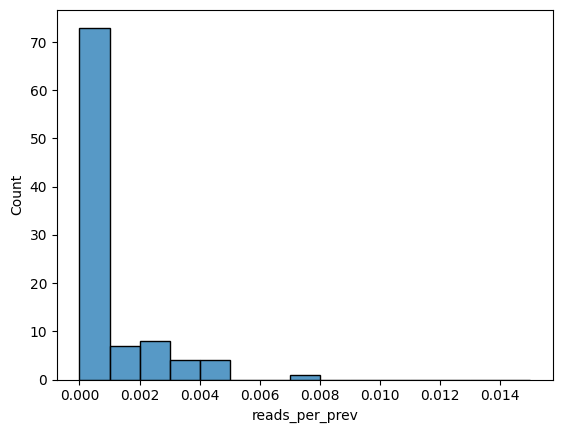

In [10]:
sns.histplot(
    data=df[df["observation_type"] == "data"]["reads_per_prev"],
    bins=np.arange(0, 0.016, 0.001),
)
plt.show()

for draw in range(1, 100, 10):
    sns.histplot(
        data=df[df["draws"] == draw]["reads_per_prev"],
        bins=np.arange(0, 0.016, 0.001),
    )
    plt.show()

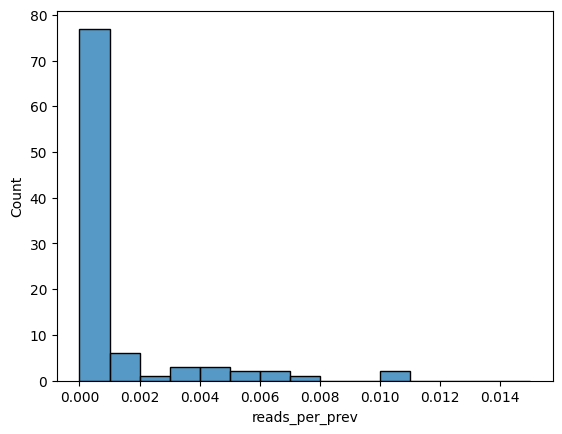

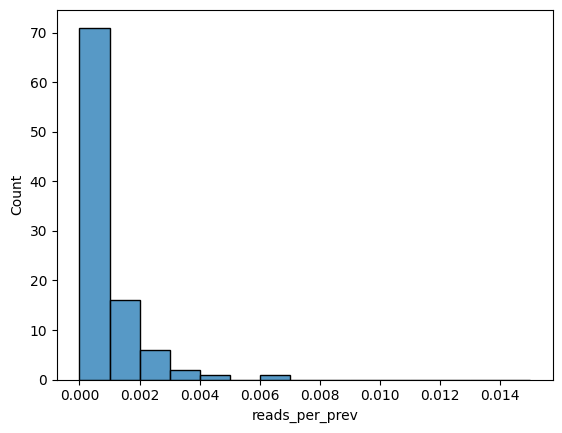

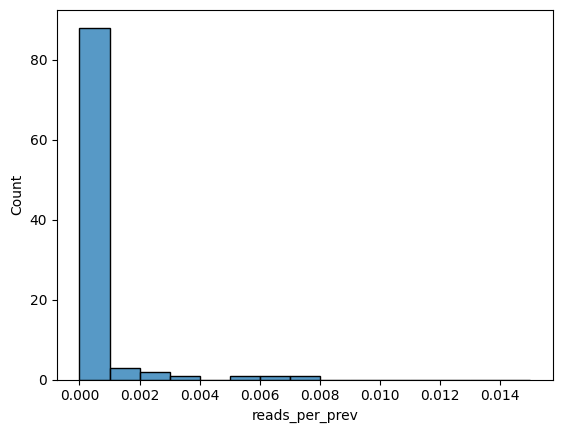

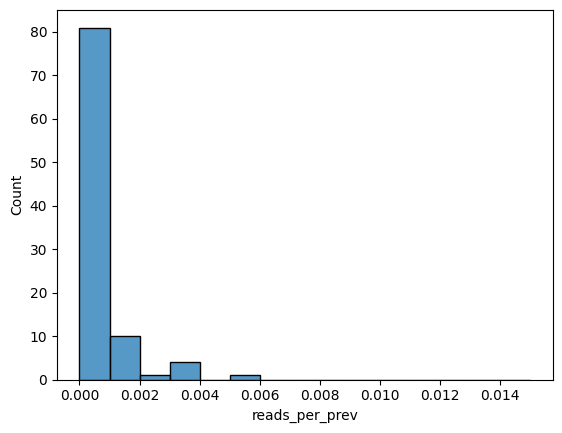

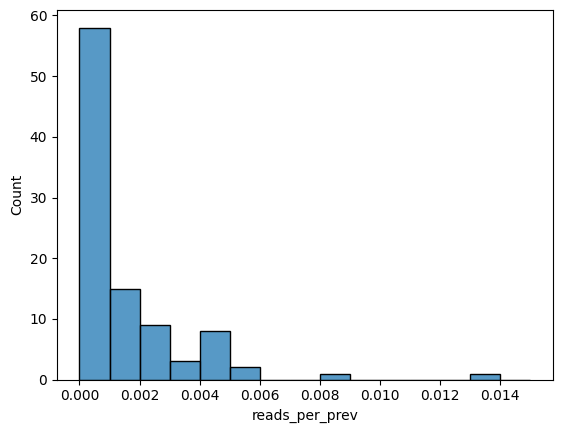

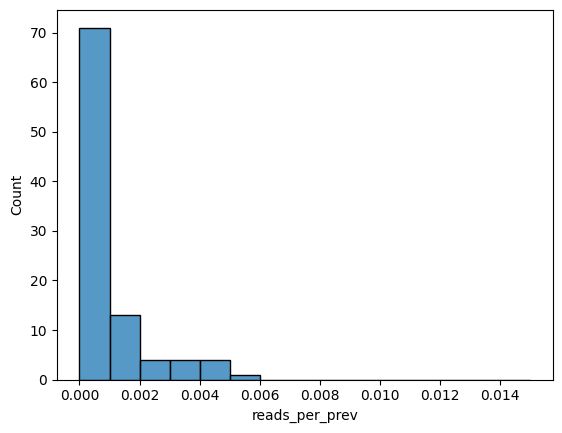

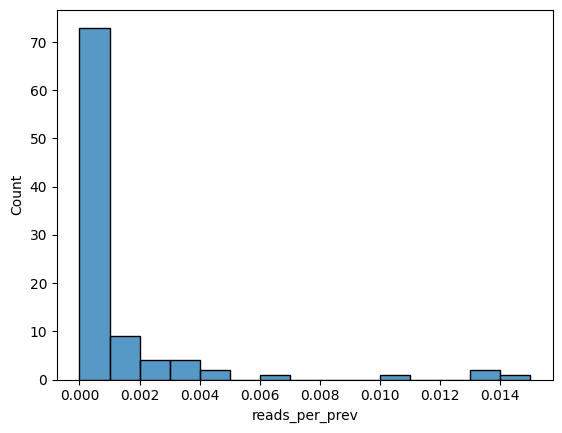

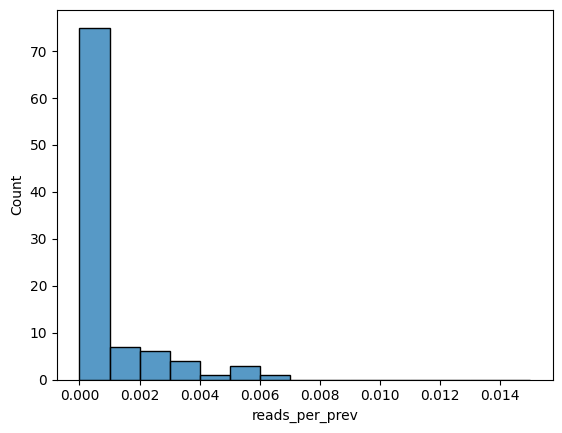

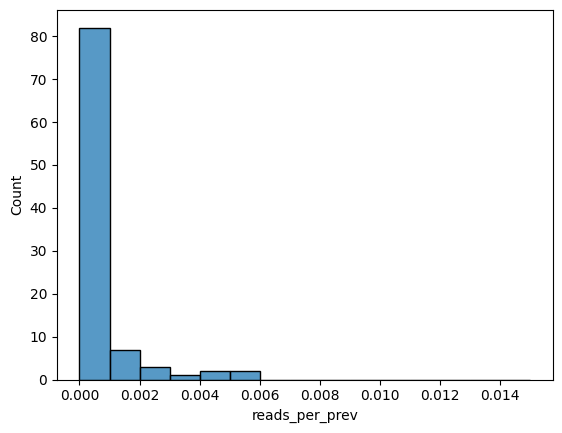

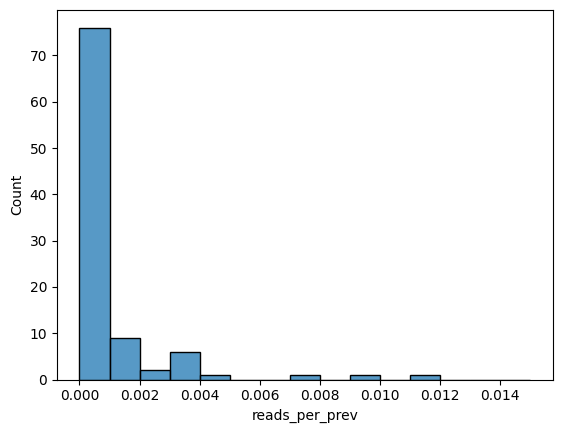

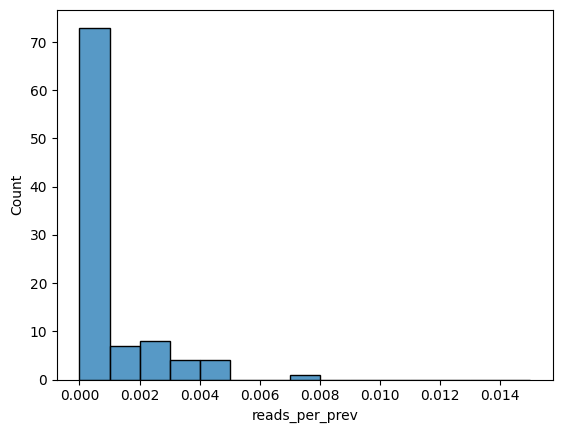

In [11]:
sns.histplot(
    data=df[df["observation_type"] == "data"]["reads_per_prev"],
    bins=np.arange(0, 0.016, 0.001),
)
plt.show()

for draw in range(1, 100, 10):
    sns.histplot(
        data=df[df["draws"] == draw]["reads_per_prev"],
        bins=np.arange(0, 0.016, 0.001),
    )
    plt.show()

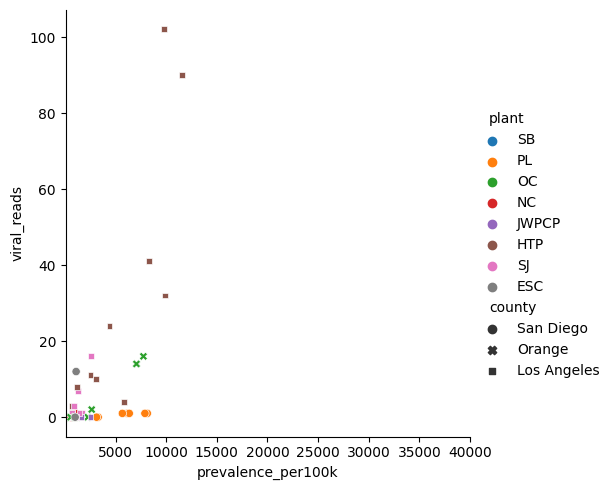

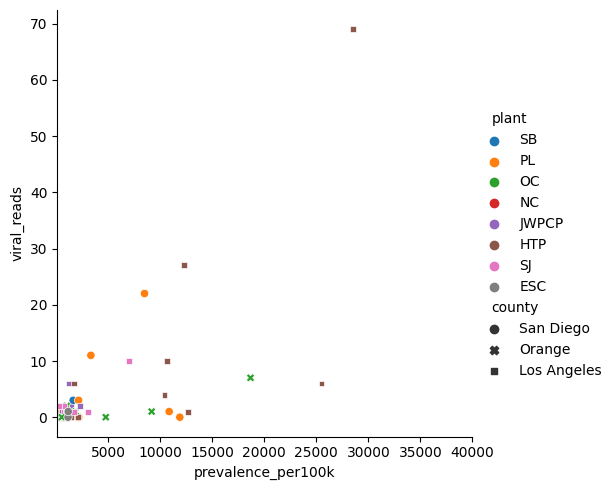

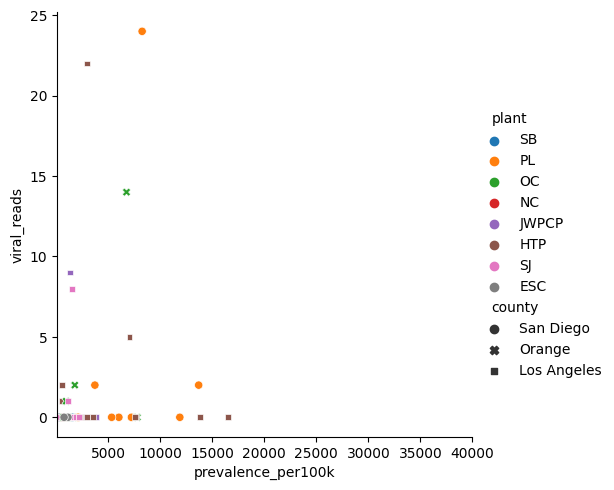

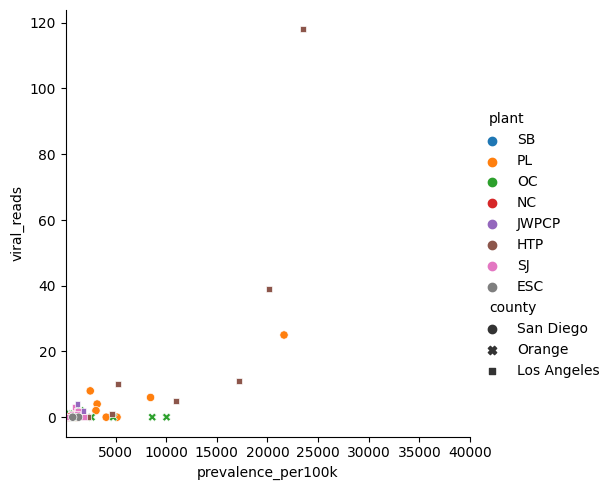

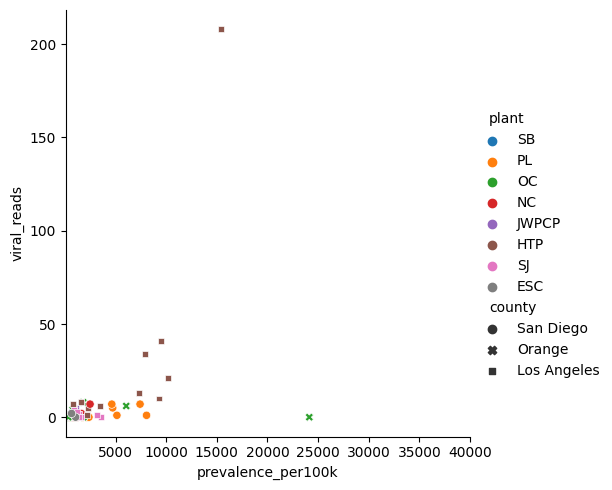

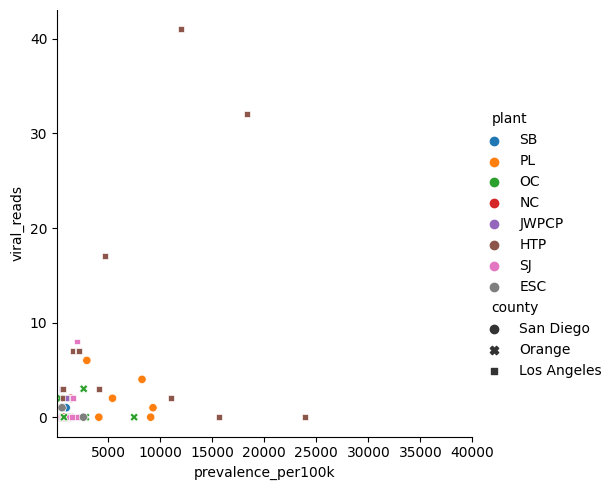

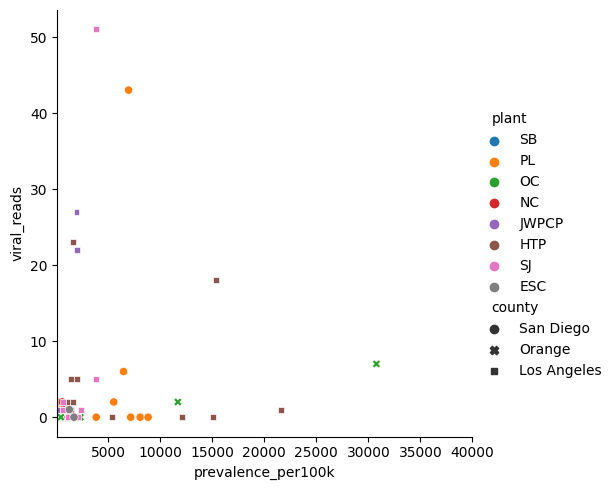

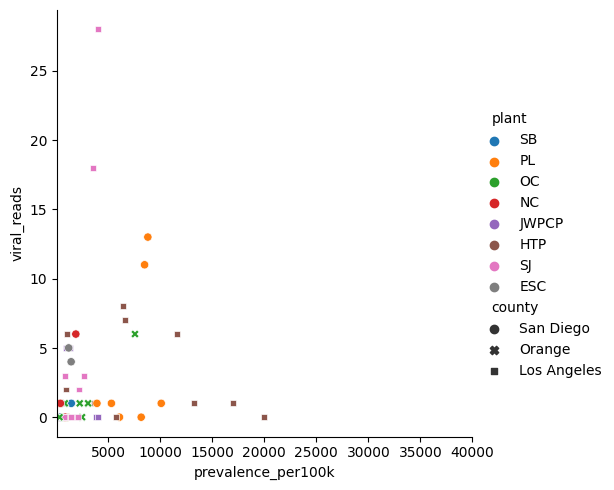

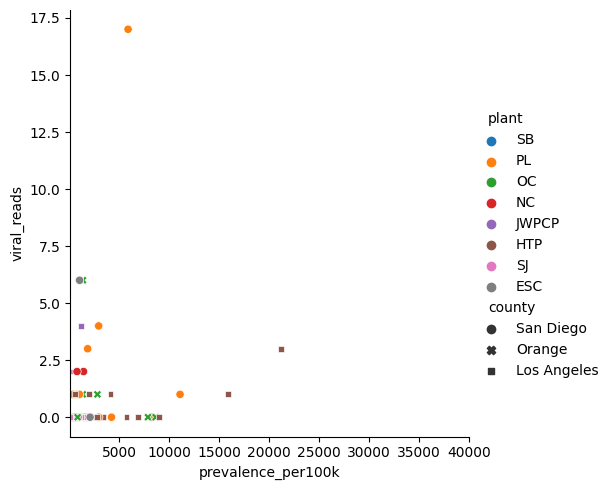

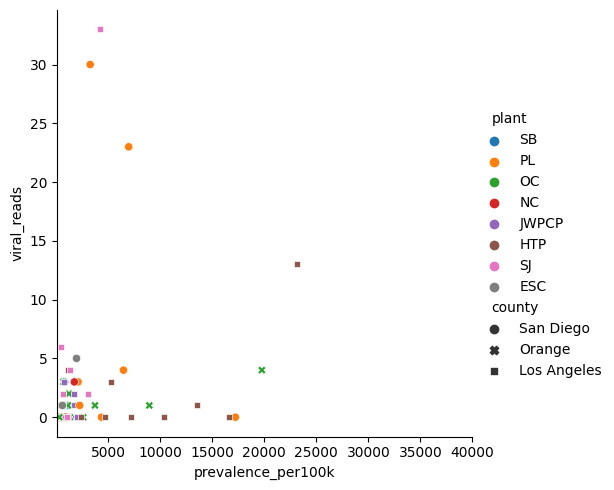

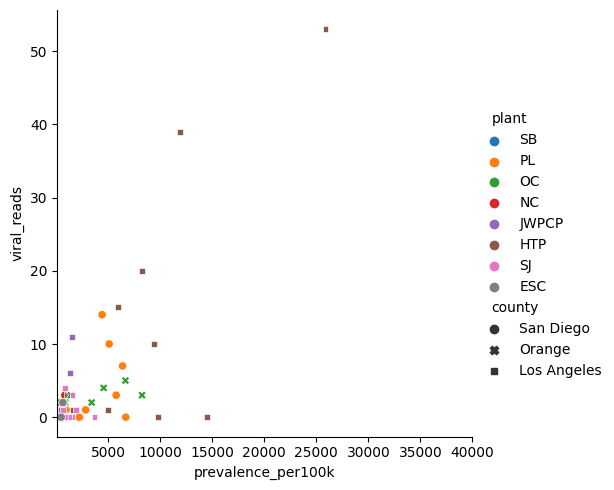

In [12]:
sns.relplot(
    data=df[df["observation_type"] == "data"],
    x="prevalence_per100k",
    y="viral_reads",
    hue="plant",
    style="county",
)
plt.xlim([9e1, 4e4])
    
for draw in range(1, 100, 10):
    sns.relplot(
        data=df[df["draws"] == draw],
        x="prevalence_per100k",
        y="viral_reads",
        hue="plant",
        style="county",
    )
    plt.xlim([9e1, 4e4])